<h1 align="center" style="color:#2E86C1; font-family:Arial;">🏨 AtliQ Hotels Data Analysis Project 📊</h1>


<p style="font-size:18px; color:#2e7d32; background-color:#e8f5e9; padding:8px; border-radius:6px;">
  <b>Importing required libraries</b>
</p>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

<div style="text-align:center; background-color:#e6f2ff; color:#003366; padding:10px; border-radius:10px; font-size:24px;">
    <b>Data Exploration</b>
</div>


<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;"><b>Reading all the data files in unique dataframes</b></p>

In [2]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

<p style="font-size:18px; color:#e65100; background-color:#fff3e0; padding:10px; border-left:5px solid #ff9800; border-radius:6px;">
  <b>1. Exploring fact_bookings data</b>
</p>


In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.shape

(134590, 12)

In [5]:
df_bookings['room_category'].unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [6]:
df_bookings['booking_platform'].unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [7]:
df_bookings["booking_platform"].value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

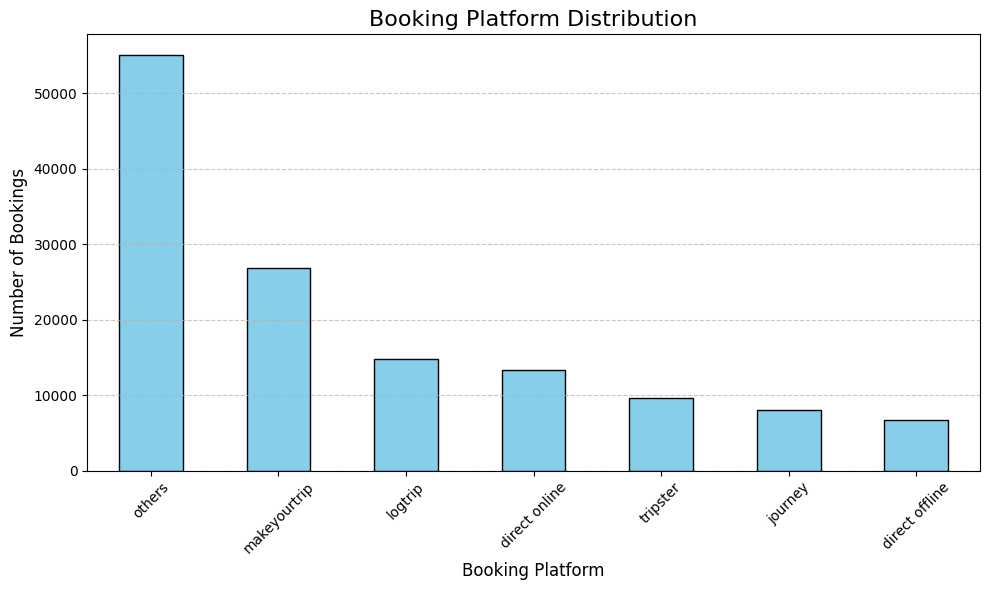

In [8]:
df_bookings["booking_platform"].value_counts().plot(kind='bar',color='skyblue',figsize=(10, 6),edgecolor='black')
# Customizations
plt.title("Booking Platform Distribution", fontsize=16)
plt.xlabel("Booking Platform", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [9]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [10]:
df_bookings.revenue_generated.min(),df_bookings.revenue_generated.max()

(np.int64(6500), np.int64(28560000))

<p style="font-size:18px; color:#e65100; background-color:#fff3e0; padding:10px; border-left:5px solid #ff9800; border-radius:6px;">
  <b>2. Exploring dim_hotels data</b>
</p>

In [11]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [12]:
df_hotels.shape

(25, 4)

In [13]:
df_hotels['category'].value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [14]:
df_hotels['property_name'].value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64

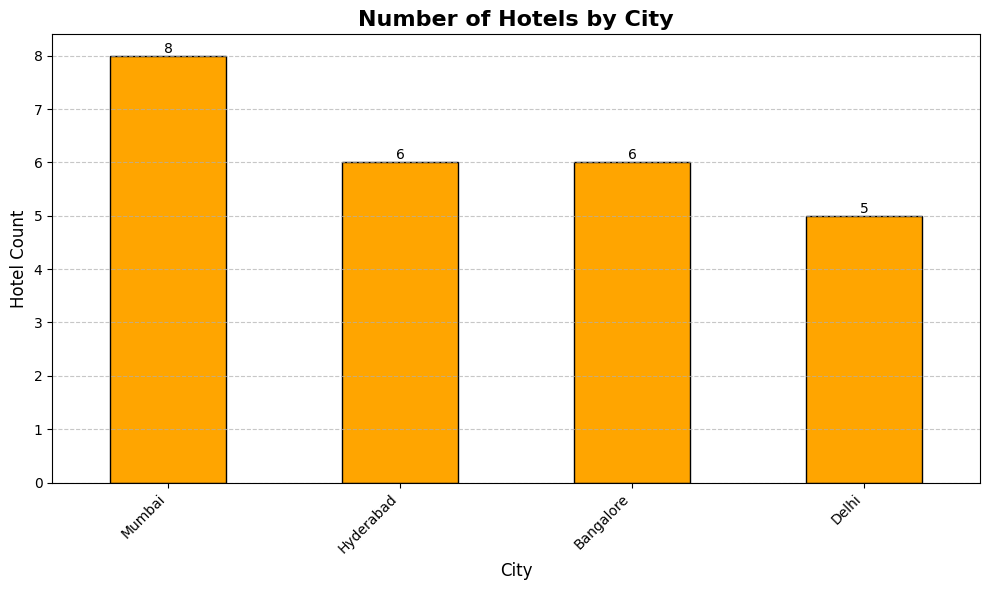

In [15]:
# Create the bar plot with customization
ax = df_hotels['city'].value_counts().plot(kind='bar',
    figsize=(10, 6),
    color='orange',
    edgecolor='black'
)

# Customize the plot
plt.title('Number of Hotels by City', fontsize=16, fontweight='bold')
plt.xlabel('City', fontsize=12)
plt.ylabel('Hotel Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

<p style="font-size:18px; color:#e65100; background-color:#fff3e0; padding:10px; border-left:5px solid #ff9800; border-radius:6px;">
  <b>3. Exploring dim_date data</b>
</p>

In [16]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [17]:
df_date.shape

(92, 4)

<p style="font-size:18px; color:#e65100; background-color:#fff3e0; padding:10px; border-left:5px solid #ff9800; border-radius:6px;">
  <b>4. Exploring dim_rooms data</b>
</p>

In [18]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


<p style="font-size:18px; color:#e65100; background-color:#fff3e0; padding:10px; border-left:5px solid #ff9800; border-radius:6px;">
  <b>5. Exploring fact_aggregated_bookings data</b>
</p>

In [19]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [20]:
df_agg_bookings.shape

(9200, 5)

In [21]:
# unique property ids in aggregate bookings dataset
df_agg_bookings['property_id'].unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [22]:
# total bookings per property_id
g = df_agg_bookings.groupby('property_id')
for id, bookings in g:
    print(f"Property Id:{id} - total bookings:{bookings['successful_bookings'].sum()} ")

Property Id:16558 - total bookings:3153 
Property Id:16559 - total bookings:7338 
Property Id:16560 - total bookings:4693 
Property Id:16561 - total bookings:4418 
Property Id:16562 - total bookings:4820 
Property Id:16563 - total bookings:7211 
Property Id:17558 - total bookings:5053 
Property Id:17559 - total bookings:6142 
Property Id:17560 - total bookings:6013 
Property Id:17561 - total bookings:5183 
Property Id:17562 - total bookings:3424 
Property Id:17563 - total bookings:6337 
Property Id:17564 - total bookings:3982 
Property Id:18558 - total bookings:4475 
Property Id:18559 - total bookings:5256 
Property Id:18560 - total bookings:6638 
Property Id:18561 - total bookings:6458 
Property Id:18562 - total bookings:7333 
Property Id:18563 - total bookings:4737 
Property Id:19558 - total bookings:4400 
Property Id:19559 - total bookings:4729 
Property Id:19560 - total bookings:6079 
Property Id:19561 - total bookings:5736 
Property Id:19562 - total bookings:5812 
Property Id:1956

In [23]:
# days on which bookings are greater than capacity
df_agg_bookings[df_agg_bookings["successful_bookings"] > df_agg_bookings["capacity"]]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [24]:
# properties that have highest capacity
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


<div style="text-align:center; background-color:#e6f2ff; color:#003366; padding:10px; border-radius:10px; font-size:24px;">
    <b>Data Cleaning</b>
</div>

<p style="font-size:18px; color:#0d47a1; background-color:#e3f2fd; padding:10px; border-left:6px solid #1976d2; border-radius:4px; box-shadow:2px 2px 5px rgba(0,0,0,0.1);">
  <b>Data Cleaning in df_bookings data</b>
</p>


In [25]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [26]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


<h3 style="background-color:#e8eaf6; color:#1a237e; padding:8px; border-radius:6px;">
  (1) Clean invalid records in <u>no_guests</u> column
</h3>

<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;">
  Upon exploration, we noticed that the <code>no_guests</code> column has some negative values, which is logically not possible.
</p>

In [27]:
# Records containing zero or negative values
df_bookings[df_bookings['no_guests'] <= 0]  

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;">
As you can see above, number of guests having less than zero value represents data error. We can ignore these records.
</p>

In [28]:
# Remove records that contains zero or negative values in 'no_guests'
df_bookings = df_bookings[df_bookings['no_guests'] > 0]  
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


<h3 style="background-color:#e8eaf6; color:#1a237e; padding:8px; border-radius:6px;">
  (2) Outlier removal in <u>revenue_generated</u> column
</h3>

In [29]:
df_bookings['revenue_generated'].min(), df_bookings['revenue_generated'].max()

(np.int64(6500), np.int64(28560000))

In [30]:
avg, std = df_bookings['revenue_generated'].mean(), df_bookings['revenue_generated'].std()
avg, std

(np.float64(15378.036937686695), np.float64(93040.1549314641))

In [31]:
higher_limit = avg + 3*std
higher_limit

np.float64(294498.50173207896)

In [32]:
df_bookings[df_bookings['revenue_generated'] > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [33]:
df_bookings = df_bookings[df_bookings['revenue_generated'] < higher_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-22,31-07-22,1/8/2022,2.0,RT4,others,2.0,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-22,31-07-22,3/8/2022,1.0,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-22,31-07-22,2/8/2022,1.0,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-22,31-07-22,1/8/2022,2.0,RT4,logtrip,2.0,Checked Out,32300,32300


<h3 style="background-color:#e8eaf6; color:#1a237e; padding:8px; border-radius:6px;">
  (3) Outlier removal in <u>revenue_realized</u> column
</h3>


In [34]:
df_bookings['revenue_realized'].head()

1     3640
4    10920
5     9100
6     3640
7     9100
Name: revenue_realized, dtype: int64

In [35]:
avg , std = df_bookings['revenue_realized'].mean(),  df_bookings['revenue_realized'].std()
avg, std

(np.float64(12695.983585117372), np.float64(6927.791692242814))

In [36]:
higher_limit = avg + 3*std
higher_limit

np.float64(33479.358661845814)

In [37]:
df_bookings[df_bookings['revenue_realized'] > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760,38760
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-22,31-07-22,2/8/2022,6.0,RT4,direct online,5.0,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-22,31-07-22,1/8/2022,6.0,RT4,others,2.0,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-22,31-07-22,1/8/2022,6.0,RT4,makeyourtrip,4.0,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-22,31-07-22,6/8/2022,5.0,RT4,direct offline,5.0,Checked Out,37050,37050


<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;">One observation we can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, we need to do data analysis only on RT4 room types</p>

In [38]:
avg, std = df_bookings[df_bookings['room_category'] == 'RT4'].revenue_realized.mean(), df_bookings[df_bookings['room_category'] == 'RT4'].revenue_realized.std()

avg, std

(np.float64(23439.308443780723), np.float64(9048.599075739918))

In [39]:
higher_limit = avg + 3*std
higher_limit

np.float64(50585.10567100048)

In [40]:
df_bookings[df_bookings['revenue_realized'] > higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;">Higher limit comes to be 50583 and in our dataframe, the max value for revenue realized is 45220. Hence, we can conclude that there is no outlier and we
don't need to do any data cleaning on this particular column</p>

<p style="font-size:18px; color:#0d47a1; background-color:#e3f2fd; padding:10px; border-left:6px solid #1976d2; border-radius:4px; box-shadow:2px 2px 5px rgba(0,0,0,0.1);">
  <b>Data Cleaning in df_agg_bookings data</b>
</p>

<h3 style="background-color:#e8eaf6; color:#1a237e; padding:8px; border-radius:6px;">
  (4) Fixing null values in columns that have null values.
</h3>


In [41]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [42]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [43]:
df_agg_bookings[df_agg_bookings.capacity.isnull() == True]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [44]:
df_agg_bookings['capacity'] = df_agg_bookings['capacity'].fillna(df_agg_bookings['capacity'].median())

In [45]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [46]:
df_agg_bookings.iloc[[8,14]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
14,17562,1-May-22,RT1,12,25.0


<h3 style="background-color:#e8eaf6; color:#1a237e; padding:8px; border-radius:6px;">
  (5) Filtering records that have successful_bookings value greater than capacity
</h3>

In [47]:
df_agg_bookings.shape

(9200, 5)

df_agg_bookings[df_agg_bookings["successful_bookings"] > df_agg_bookings['capacity']]

In [48]:
df_agg_bookings = df_agg_bookings[df_agg_bookings["successful_bookings"] <= df_agg_bookings['capacity']]
df_agg_bookings.shape

(9194, 5)

<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;">As you can see above, number of values that represents data error. We can remove these records.</p>

<div style="text-align:center; background-color:#e6f2ff; color:#003366; padding:10px; border-radius:10px; font-size:24px;">
    <b>Data Transformation</b>
</div>

<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;"><b>Data Transformation</b> is the process of changing the format, structure, or values of data to make it more suitable for analysis or modeling.</p>

<h3 style="background-color:#e8eaf6; color:#1a237e; padding:8px; border-radius:6px;">
  Create a occ_pct(occupancy percentage) column
</h3>

In [49]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [50]:
# df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)

# """C:\Users\samir\AppData\Local\Temp\ipykernel_7440\2043927656.py:1: SettingWithCopyWarning: 
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead

# See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#   df_agg_bookings['occ_pct'] = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1) """


In [51]:
new_col = df_agg_bookings.apply(lambda row: row['successful_bookings']/row['capacity'], axis=1)
df_agg_bookings = df_agg_bookings.assign(occ_pct=new_col.values)
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667


In [52]:
df_agg_bookings['occ_pct'] = df_agg_bookings['occ_pct'].apply(lambda x: round(x*100, 2))
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67


<div style="text-align:center; background-color:#e6f2ff; color:#003366; padding:10px; border-radius:10px; font-size:24px;">
    <b>Insights Generation</b>
</div>

<div style="background-color:#e3f2fd; border-left:6px solid #2196f3; padding:12px; border-radius:6px; font-size:17px; color:#0d47a1;">
  <b>💡 Insight 1:</b> an average occupancy rate in each of the room categories
</div>

In [53]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [54]:
df_agg_bookings.groupby("room_category").occ_pct.mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;">I don't understand RT1, RT2 etc. I want to print room categories such as Standard, Premium, Elite etc along with average occupancy percentage, that's why I create a new temporary dataframe that includes room classes<p></p>

In [55]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on='room_id')
df.drop('room_id', axis=1, inplace=True)

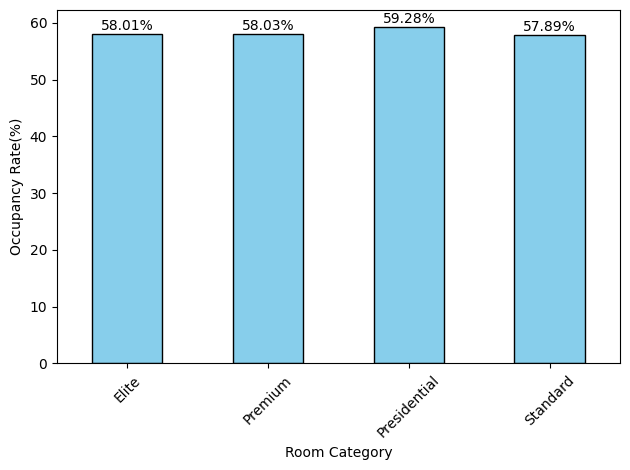

In [56]:
room_class_avg = df.groupby("room_class")["occ_pct"].mean()

room_class_avg.plot(kind='bar', color='skyblue', edgecolor='black')
# Title and labels
# plt.title("Average Occupancy Percentage by Room Category")
plt.ylabel("Occupancy Rate(%)")
plt.xlabel("Room Category")
plt.xticks(rotation=45)

# Show percentage labels on bars
for i, value in enumerate(room_class_avg):
    plt.text(i, value + 0.2, f"{value:.2f}%", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<div style="background-color:#e8f5e9; border-left:6px solid #43a047; padding:12px; border-radius:6px; font-size:17px; color:#1b5e20;">
  <b>✅ Insight 2:</b> average occupancy rate per city
</div>


In [57]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [58]:
df = pd.merge(df, df_hotels, on='property_id')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.33,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.67,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.74,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.00,Standard,Atliq City,Business,Mumbai


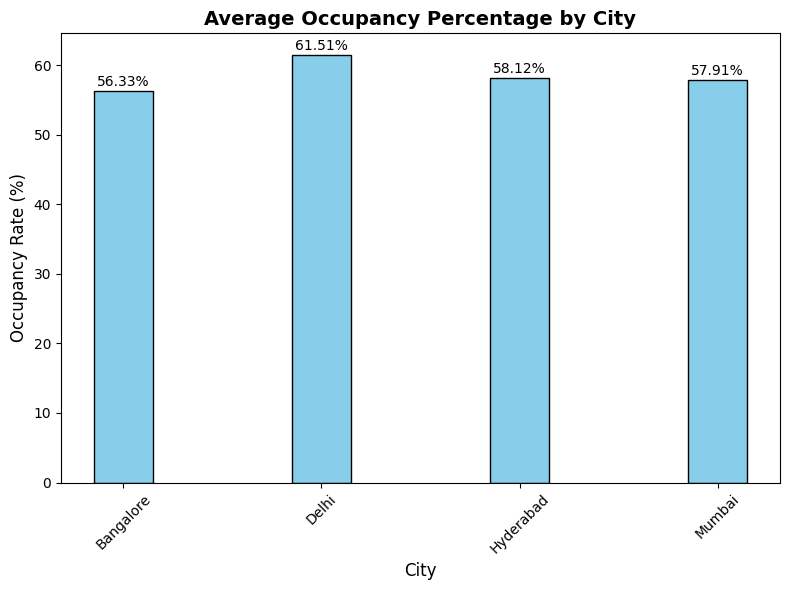

In [59]:
# Group and store average occupancy by city
city_occ_avg = df.groupby("city")["occ_pct"].mean()

# Create the plot with reduced bar width
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(city_occ_avg.index, city_occ_avg.values, 
              color='skyblue', edgecolor='black', width=0.3)  # 👈 width reduced from default 0.8

# Add labels and title
ax.set_title("Average Occupancy Percentage by City", fontsize=14, fontweight='bold')
ax.set_ylabel("Occupancy Rate (%)", fontsize=12)
ax.set_xlabel("City", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add percentage labels on each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f"{height:.2f}%", 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<div style="background-color:#f3e5f5; border-left:6px solid #8e24aa; padding:12px; border-radius:6px; font-size:17px; color:#4a148c;">
  <b>🔍 Insight 3:</b> When was the occupancy better? Weekday or Weekend?
</div>


In [60]:
df = pd.merge(df,df_date, left_on="check_in_date", right_on='date')
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.72,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.33,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.33,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [61]:
df.groupby("day_type").occ_pct.mean()

day_type
weekeday    50.883140
weekend     72.343625
Name: occ_pct, dtype: float64

<p style="font-size:16px; color:#424242; background-color:#f1f8e9; padding:10px; border-left:4px solid #8bc34a; border-radius:4px;">Occupancy was the better on Weekends</p>

<div style="background-color:#e8eaf6; border-left:6px solid #3f51b5; padding:12px; border-radius:6px; font-size:17px; color:#1a237e;">
  <b>📅 Insight 4:</b> In the month of June, the occupancy rate for different cities
</div>


In [62]:
df['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [63]:
df_jun22 = df[df['mmm yy']=='Jun 22']
df_jun22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.67,Standard,Atliq Palace,Business,Bangalore,10-Jun-22,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.37,Standard,Atliq Grands,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.89,Standard,Atliq Grands,Luxury,Delhi,10-Jun-22,Jun 22,W 24,weekeday


In [64]:
df_jun22.groupby("city").occ_pct.mean()

city
Bangalore    56.436143
Delhi        62.474286
Hyderabad    58.458075
Mumbai       58.382560
Name: occ_pct, dtype: float64

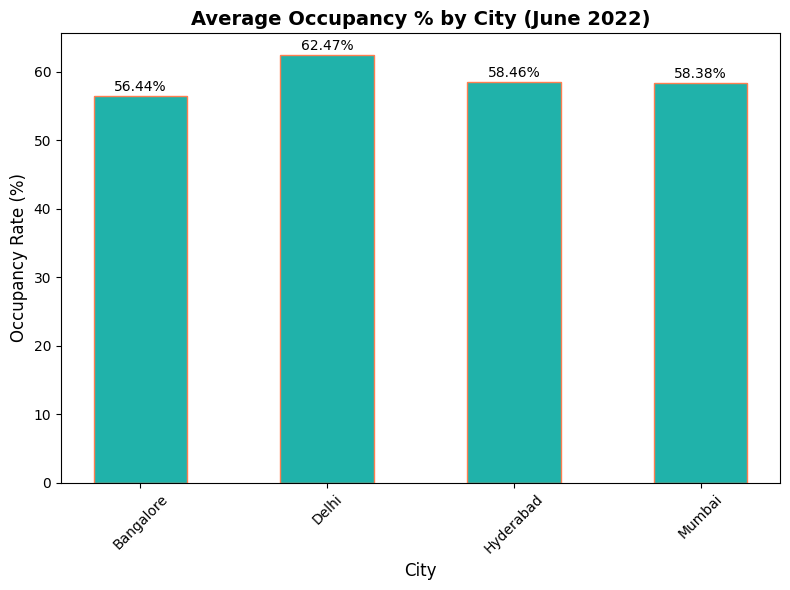

In [65]:
# Grouping
city_occ_avg_jun = df_jun22.groupby("city")["occ_pct"].mean()

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(city_occ_avg_jun.index, city_occ_avg_jun.values, 
              color='lightseagreen', edgecolor='coral', width=0.5)

# Title and Labels
ax.set_title("Average Occupancy % by City (June 2022)", fontsize=14, fontweight='bold')
ax.set_xlabel("City", fontsize=12)
ax.set_ylabel("Occupancy Rate (%)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Add percentages on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.3, f"{height:.2f}%", 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


**We got new data for the month of august. Append that to existing data**

In [66]:
df_august = pd.read_csv("datasets/new_data_august.csv")
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [67]:
df_august.columns 

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [68]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occ_pct', 'room_class', 'property_name', 'category',
       'city', 'date', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [69]:
df_august.shape

(7, 13)

In [70]:
df.shape

(6497, 14)

In [71]:
latest_df = pd.concat([df, df_august], ignore_index=True, axis=0)
latest_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [72]:
latest_df.shape

(6504, 15)

<div style="background-color:#e3f2fd; border-left:6px solid #2196f3; padding:12px; border-radius:6px; font-size:17px; color:#0d47a1;">
  <b>💰 Insight 5:</b> revenue realized per city
</div>


In [73]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100


In [74]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [75]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [76]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

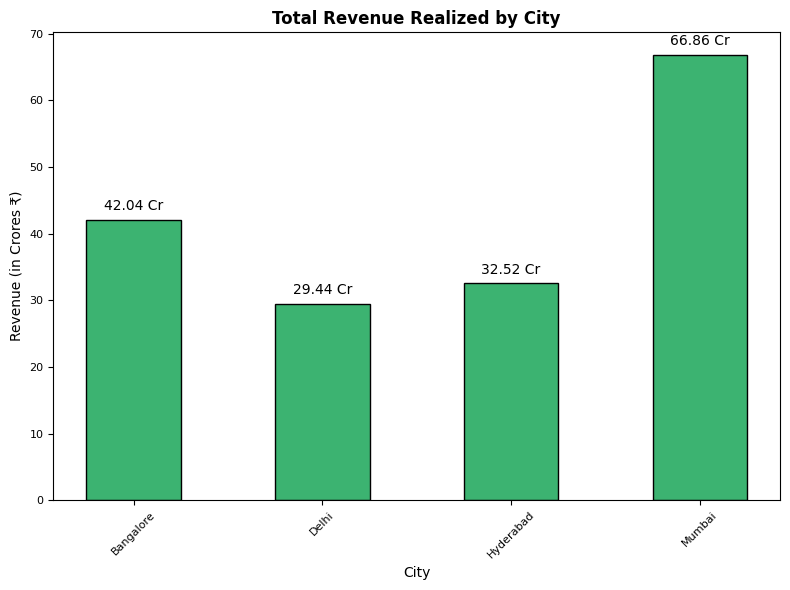

In [77]:
# Group and store revenue data
revenue_by_city = df_bookings_all.groupby("city")["revenue_realized"].sum()

# Convert revenue to crores for better readability
revenue_by_city_crore = revenue_by_city / 1e7  # 1 crore = 10 million

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(revenue_by_city_crore.index, revenue_by_city_crore.values,
              color='mediumseagreen', edgecolor='black', width=0.5)

# Labels and title
ax.set_title("Total Revenue Realized by City", fontsize=12, fontweight='bold')
ax.set_ylabel("Revenue (in Crores ₹)", fontsize=10)
ax.set_xlabel("City", fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)

# Show revenue values on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.2f} Cr", 
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<div style="background-color:#fff3e0; border-left:6px solid #fb8c00; padding:12px; border-radius:6px; font-size:17px; color:#e65100;">
  <b>📆 Insight 6:</b> month by month revenue
</div>


In [78]:
df_bookings_all.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
4,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100,9100,Atliq Grands,Luxury,Delhi


In [79]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [80]:
df_date['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [81]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [82]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [83]:
df_date['date'] = pd.to_datetime(df_date['date'])

C:\Users\samir\AppData\Local\Temp\ipykernel_12984\2122144948.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_date['date'] = pd.to_datetime(df_date['date'])


In [84]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      92 non-null     datetime64[ns]
 1   mmm yy    92 non-null     object        
 2   week no   92 non-null     object        
 3   day_type  92 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.0+ KB


In [85]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"],errors="coerce")
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [86]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [87]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    60278496
Jun 22    52903014
May 22    60961428
Name: revenue_realized, dtype: int64

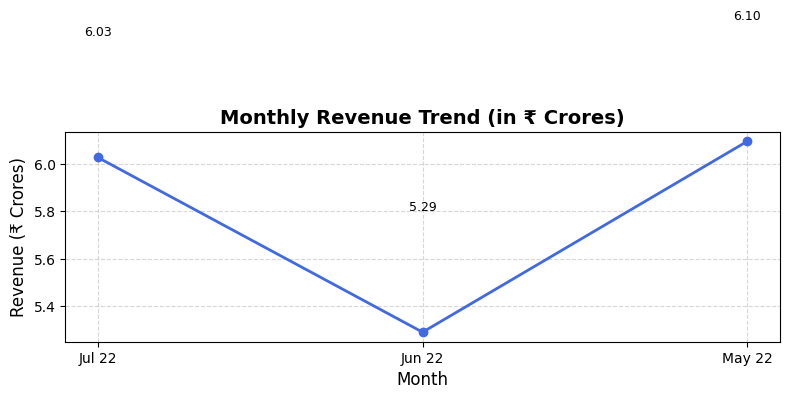

In [88]:
# Assuming this is your grouped data
monthly_revenue = df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

# Convert to crores
monthly_revenue_crore = monthly_revenue / 1e7  # ₹ in crores

# Plotting
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(monthly_revenue_crore.index, monthly_revenue_crore.values,
        marker='o', linestyle='-', color='royalblue', linewidth=2)

# Title and labels
ax.set_title("Monthly Revenue Trend (in ₹ Crores)", fontsize=14, fontweight='bold')
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Revenue (₹ Crores)", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Annotate each point
for i, value in enumerate(monthly_revenue_crore):
    ax.text(i, value + 0.5, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<div style="background-color:#e0f2f1; border-left:6px solid #00897b; padding:12px; border-radius:6px; font-size:17px; color:#004d40;">
  <b>🏨 Insight 7:</b> revenue realized per hotel type
</div>


In [89]:
df_bookings_all.groupby("property_name").revenue_realized.sum()

property_name
Atliq Bay        26936115
Atliq Blu        26459751
Atliq City       29047727
Atliq Exotica    32436799
Atliq Grands     21644446
Atliq Palace     30945855
Atliq Seasons     6672245
Name: revenue_realized, dtype: int64

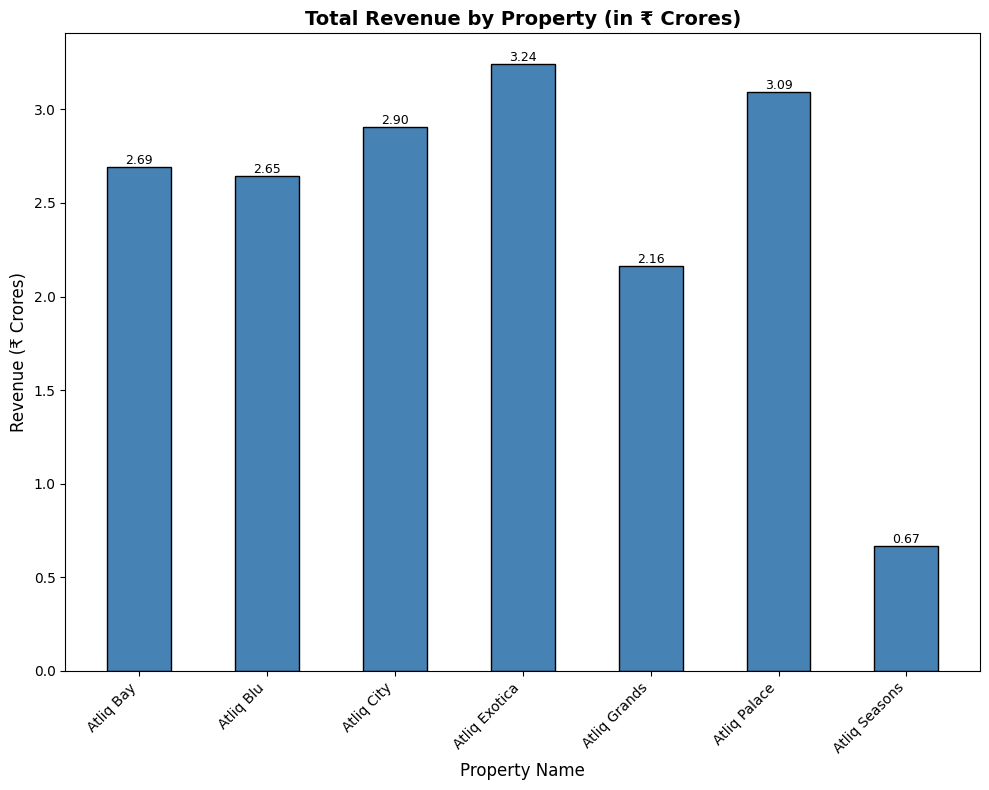

In [90]:
# Group and convert revenue to crores
property_revenue = df_bookings_all.groupby("property_name")["revenue_realized"].sum()
property_revenue_crore = property_revenue / 1e7  # ₹ in crores

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.bar(property_revenue_crore.index, property_revenue_crore.values,
              color='steelblue', edgecolor='black', width=0.5)

# Labels & Title
ax.set_title("Total Revenue by Property (in ₹ Crores)", fontsize=14, fontweight='bold')
ax.set_xlabel("Property Name", fontsize=12)
ax.set_ylabel("Revenue (₹ Crores)", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0, f"{height:.2f}", 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


<div style="background-color:#e8f5e9; border-left:6px solid #43a047; padding:12px; border-radius:6px; font-size:17px; color:#1b5e20;">
  <b>🌟 Insight 8:</b> average rating per city
</div>


In [91]:
df_bookings_all.groupby("property_name").ratings_given.mean()

property_name
Atliq Bay        3.728492
Atliq Blu        3.892391
Atliq City       3.691552
Atliq Exotica    3.591432
Atliq Grands     3.085482
Atliq Palace     3.794057
Atliq Seasons    2.352941
Name: ratings_given, dtype: float64

<div style="background-color:#fce4ec; border-left:6px solid #d81b60; padding:12px; border-radius:6px; font-size:17px; color:#880e4f;">
  <b>📊 Insight 9:</b> a pie chart of revenue realized per booking platform
</div>


In [92]:
df_bookings_all.groupby("booking_platform").revenue_realized.sum()

booking_platform
direct offline     8986465
direct online     17488976
journey           10757858
logtrip           18605339
makeyourtrip      34034257
others            72310965
tripster          11959078
Name: revenue_realized, dtype: int64

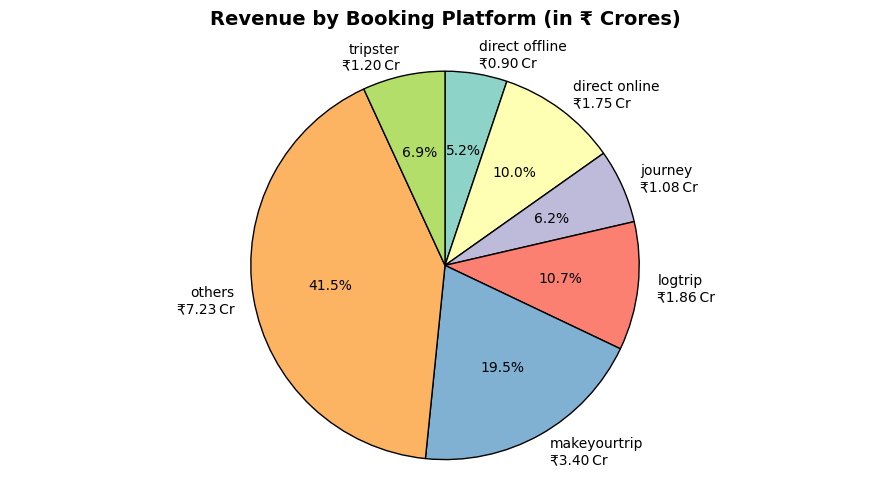

In [93]:
import matplotlib.pyplot as plt

# 1️⃣ Group & sum revenue by platform
platform_revenue = df_bookings_all.groupby("booking_platform")["revenue_realized"].sum()

# 2️⃣ Convert to crores for readability (optional)
platform_revenue_crore = platform_revenue / 1e7

# 3️⃣ Build labels showing both platform name & value
labels = [
    f"{platform}\n₹{revenue:.2f} Cr"
    for platform, revenue in zip(platform_revenue_crore.index, platform_revenue_crore.values)
]

# 4️⃣ Plot pie
fig, ax = plt.subplots(figsize=(9,5))
ax.pie(
    platform_revenue_crore.values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
    colors=plt.cm.Set3.colors,
    wedgeprops={'edgecolor': 'black'},
    textprops={'fontsize': 10}
)

# 5️⃣ Title & styling
ax.set_title("Revenue by Booking Platform (in ₹ Crores)", fontsize=14, fontweight='bold', pad=20)
ax.axis("equal")  # keep it a perfect circle

plt.tight_layout()
plt.show()


# 🏨 AtliQ Hotels Analysis – Comprehensive Insights and Strategic Recommendations

---

## 📊 Key Insights

---

### 💰 1. Booking Platform Distribution
- **"Others"** is the most used platform with **55,066 bookings**, followed by **MakeYourTrip (26,898)**
- **Direct online bookings**: 13,379
- Heavy reliance on **third-party platforms**, indicating a need to boost **direct bookings**

---

### 💵 2. Revenue Analysis
- **Total revenue by city**:
  - Mumbai: ₹66.86 Cr
  - Bangalore: ₹42.04 Cr
  - Hyderabad: ₹32.52 Cr
  - Delhi: ₹29.44 Cr
- **Monthly revenue trend** (May–July 2022):
  - May: ₹6.10 Cr
  - June: ₹5.29 Cr
  - July: ₹6.03 Cr
- **Top-performing properties**:
  - Atliq Exotica (₹3.24 Cr)
  - Atliq Palace (₹3.09 Cr)
  - Atliq City (₹2.90 Cr)
- **Platform revenue**:
  - Others: ₹7.23 Cr
  - MakeYourTrip: ₹3.40 Cr

---

### 🏨 3. Occupancy Analysis
- **Overall occupancy**:
  - Weekends: 72.34%
  - Weekdays: 50.88%
- **Room-wise occupancy**:
  - Presidential: 59.28%
  - Premium: 58.03%
  - Elite: 58.01%
  - Standard: 57.89%
- **City-wise occupancy (June 2022)**:
  - Delhi: 62.47%
  - Hyderabad: 58.46%
  - Mumbai: 58.38%
  - Bangalore: 56.44%

---

### 🌟 4. Guest Experience
- **Average guest ratings**:
  - Highest: Atliq Blu (3.89)
  - Lowest: Atliq Seasons (2.35)
- **Data cleaning**: Negative values in guest numbers were removed

---

### 🛏️ 5. Capacity Management
- Some properties exceeded room capacity — possible overbooking
- Property ID **17558** had the highest capacity (50 rooms)

---

## 🎯 Strategic Recommendations

---

### 📈 1. Revenue Optimization
- 🔁 Promote direct bookings:
  - Offer loyalty programs and website-exclusive deals
- 🏷️ Premium pricing:
  - Slight increase in Presidential and Premium room rates due to higher demand
- 📉 Boost weekday occupancy:
  - Launch weekday-only deals or business packages

---

### ⚙️ 2. Operational Improvements
- 🛠️ Capacity planning:
  - Expand or apply surge pricing at high-occupancy properties (like ID 17558)
- 🧹 Data validation:
  - Add checks for negative guest values or unrealistic booking amounts
- 📊 Revenue audit:
  - Investigate anomalies like ₹28.56M bookings

---

### 📢 3. Marketing Focus
- 🌐 Platform-specific strategy:
  - Focus on strong performers like MakeYourTrip & Logtrip
- 🌆 City campaigns:
  - Mumbai = high revenue, moderate occupancy → room for pricing optimization
- 💎 Promote top-rated hotels:
  - Use Atliq Blu’s 3.89 rating in advertisements

---

### 🙋 4. Guest Experience Enhancements
- 🧹 Fix Atliq Seasons:
  - Staff retraining or facility improvements to raise low rating (2.35)
- ⭐ Encourage ratings:
  - Use rating prompts with small incentives post-checkout
- ❌ Study cancellations:
  - Identify trends and causes for cancellations and prevent them

---

### 💻 5. Technology Investments
- 🖥️ Upgrade direct booking platform for better user experience
- 📉 Use dynamic pricing tools to auto-adjust rates by demand
- 📊 Integrated dashboard to view real-time booking, revenue, and occupancy data

---

## 🛠️ Implementation Roadmap

| Timeline     | Action Item                                                                 |
|--------------|------------------------------------------------------------------------------|
| 0–3 Months   | Launch direct booking campaign, basic data validation, weekday promotions, rating incentive |
| 3–6 Months   | Property improvement plans, review platform partners, dynamic pricing pilot, staff training |
| 6–12 Months  | Tech upgrades, property expansions, revenue management strategy, brand refinement |

---

## ✅ Conclusion

This analysis highlights **huge growth potential** for AtliQ Hotels through better **revenue optimization**, **platform management**, and **guest satisfaction** improvements.

By using **data-driven strategies** across the board — from marketing to operations — AtliQ can boost performance, minimize leakage, and **stand out in the competitive hospitality industry**.

---
